# CS171 - Spring 2019 - Assignment 1
### Instructor: Vagelis Papalexakis

In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [30]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
#data

## Question 1: Data Visualization [20%]


### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

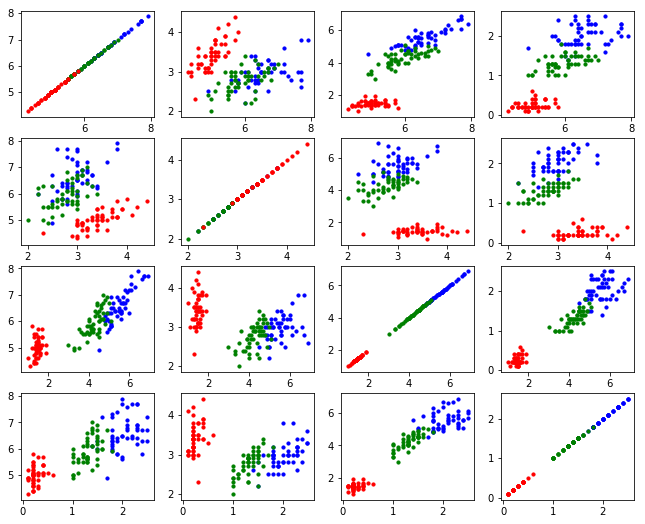

In [31]:
#your code here
colors = ['b','g','r']
figsize=11,9
plt.figure(figsize=figsize)
label_com=['Iris-virginica','Iris-versicolor','Iris-setosa']
data_feature=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
i=0
#for index in range(3):
   # i=i+1
for index1 in range(4):
    for index2 in range(4):
        i=i+1
        for index in range(3):
            x = data.loc[data['label'] == label_com[index]][data_feature[index1]]
            y = data.loc[data['label'] == label_com[index]][data_feature[index2]]
            plt.subplot(4,4,i)
            #if(index1 == index2):
                #plt.title('1')
            plt.scatter(x,y,c=colors[index],s=10)
            #plt.scatter(x,y,c=colors[index],s=10)
#plt.scatter(x=data['sepal_length'],y=data['sepal_width'],c='r')

plt.show()


Your answer here:
2. petal_length & petal_width
3. It's vivid to show a plot so that we can see that if two features are related or not. Then if they're related, maybe we can use some methods like PCA to discard some features, and use some machine learning algorithms to classify.

### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

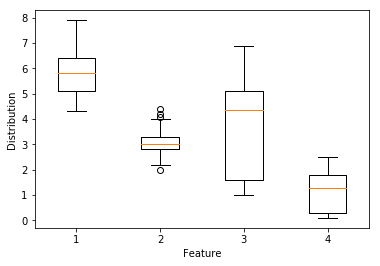

In [32]:
plt.boxplot([data['sepal_length'],data['sepal_width'],data['petal_length'],data['petal_width']])
plt.xlabel('Feature')
plt.ylabel('Distribution')
plt.show()

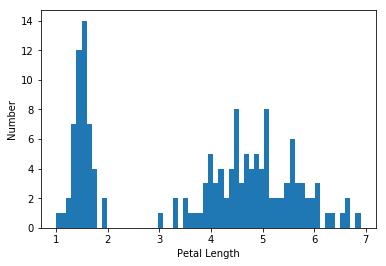

In [33]:
#your code here

plt.hist(data['petal_length'],bins=60)
plt.xlabel('Petal Length')
plt.ylabel('Number')
plt.show()

Your answer here:Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

3. Yes. The boxplot gives us the distribution of the lenth of petal graphically,so we can roughly know the distribution of the data. However, we can accurately know the number of each data point by the histogram. So there are more information in the histogram than in the boxplot.

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [34]:
#data.loc[1].values[:4]

In [37]:
#your code here
import math

def CalDistance(p1,p2,p):
    dis = 0
    for i in range(len(p1)):
        dis = dis + (p1[i] - p2[i]) ** p
    dis = dis ** (1/p)
    return dis
def ChosePoints(num1,num2):
    return CalDistance(data.loc[num1].values[:4],data.loc[num2].values[:4],2)

op1 = ChosePoints(1,3)

#numpy
op2 = np.linalg.norm(data.loc[1].values[:4] - data.loc[3].values[:4])

print(op1)
print(op2)
print(op1 - op2)

0.3316624790355407
0.3316624790355407
0.0


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


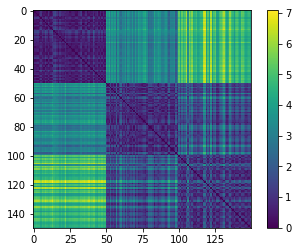

In [38]:
#your code here
import math
dists = np.zeros((len(data['sepal_length']),len(data['sepal_width'])))
v1 = data['sepal_length'].values
v2 = data['sepal_width'].values
v3 = data['petal_length'].values
v4 = data['petal_width'].values
for i in range(len(data['sepal_length'])):
    for j in range(len(data['sepal_width'])):
        dists[i][j] = math.sqrt((v1[i] - v1[j])**2 + (v2[i] - v2[j]) ** 2 +(v3[i] - v3[j]) ** 2 +(v4[i] - v4[j]) ** 2)
print(dists)
plt.imshow(dists)
plt.colorbar()
plt.show()

Your answer here:
3. 
4. The same class data points are closer to each other, comparing with which are different classes.

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

In [39]:
#data
len(data)

150

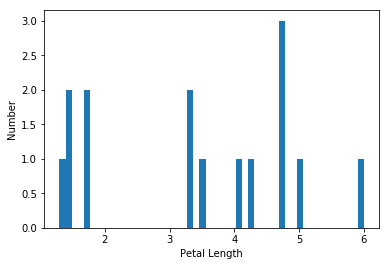

In [40]:
#your code here
import random
def reservoir_sampling(stream,M):
    res = pd.DataFrame(columns = data_names)
    for i in range(M):
        #print(i)
        res.loc[i] = stream.loc[i]
    for i in range(M,len(stream)):
        j = random.randint(1,i)
        if(j < M):
            res.loc[j] = stream.loc[i]
    return res
t1 = reservoir_sampling(data,15)

plt.hist(t1['petal_length'],bins=50)
plt.xlabel('Petal Length')
plt.ylabel('Number')
plt.show()

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

In [41]:
#aaa= data[data['label']=='Iris-virginica'].values
#pd.DataFrame(aaa)
#pd.DataFrame(data[data['label']=='Iris-virginica'].values,columns = data_names)

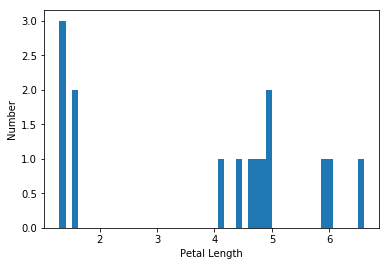

In [46]:
#your code here
# label_com=['Iris-virginica','Iris-versicolor','Iris-setosa']
#for i in range(3):
#    print(i)
v1 = reservoir_sampling(pd.DataFrame(data[data['label']=='Iris-virginica'].values,columns = data_names),5)
v2 = reservoir_sampling(pd.DataFrame(data[data['label']=='Iris-versicolor'].values,columns = data_names),5)
v3 = reservoir_sampling(pd.DataFrame(data[data['label']=='Iris-setosa'].values,columns = data_names),5)
v1.values
temp = np.append(v1.values,v2.values)
EndData = np.append(temp,v3.values)
EndData.shape
EndData = EndData.reshape(15,5)
t2 = pd.DataFrame(EndData,columns = data_names)
plt.hist(t2['petal_length'],bins=50)
plt.xlabel('Petal Length')
plt.ylabel('Number')
plt.show()

Your answer here:
3. The stratified histograms is more close to the original petal lenth distribution.